### Read in data And NLKT Basics

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [70]:
import nltk

In [71]:
#its alwasy better to know which directory we are working.
import os
current_directory = os.getcwd()
print("Current_Working_Directory:", current_directory)

Current_Working_Directory: C:\Users\viraj\Code_a\Machine_learning\Amazon_food_review


In [72]:
directory_path = "C:/Users/viraj/Code_a/Machine_learning/Amazon_food_review"
contents = os.listdir(directory_path)
print("Contents")
for i in contents:
    print(i)

Contents
.git
.ipynb_checkpoints
archive (8).zip
database.sqlite
hashes.txt
Reviews.csv
Sentiment_analysis.ipynb


In [73]:
df=pd.read_csv("C:/Users/viraj/Code_a/Machine_learning/Amazon_food_review/Reviews.csv")

In [74]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [75]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [76]:
df.Text.values[0:5]

array(['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
       'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
       'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
    

In [77]:
df.shape

(568454, 10)

In [78]:
df1=df.head(3000)

In [79]:
df1.shape

(3000, 10)

### EDA(Exploratory Data Analysis)

<AxesSubplot:xlabel='Score'>

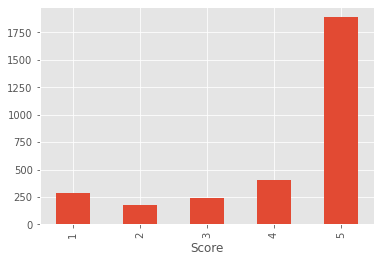

In [80]:
df1.Score.value_counts().sort_index().plot(kind='bar')

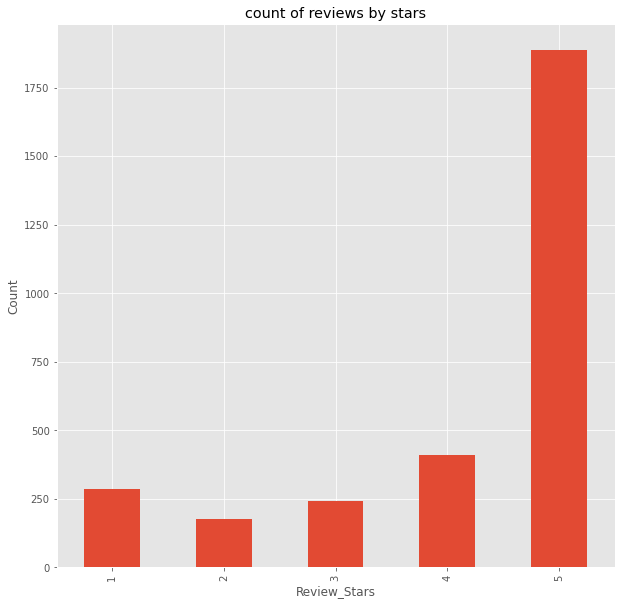

In [81]:
ax=df1.Score.value_counts().sort_index().plot(kind='bar',title='count of reviews by stars',figsize=(10,10))
ax.set_xlabel('Review_Stars')
ax.set_ylabel("Count")
plt.show()

In [82]:
example=df.Text.values[50]

In [83]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [84]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [85]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [86]:
#nltk.download('averaged_perceptron_tagger')

In [87]:
%%time
nltk.pos_tag(tokens)

CPU times: total: 0 ns
Wall time: 112 ms


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [88]:
POS_Tagging: "https://www.guru99.com/pos-tagging-chunking-nltk.html"

In [89]:
%%time
tagged=nltk.pos_tag(tokens)
tagged[:10]

CPU times: total: 0 ns
Wall time: 3.06 ms


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [90]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### _Vader_Sentiment_Scoring

In [91]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\viraj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [92]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progress Bar tracker
sia = SentimentIntensityAnalyzer()

In [93]:
sia.polarity_scores("i am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [94]:
sia.polarity_scores("this is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [95]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [96]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [97]:
#Lets run the polarity score on the dataset

In [98]:
%%time
res=dict()
for i,row in tqdm(df1.iterrows(),total=len(df1)):
    #print(i,row['Text'])
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/3000 [00:00<?, ?it/s]

CPU times: total: 1.7 s
Wall time: 5.35 s


In [99]:
pd.DataFrame(res).T  # .t is used for Transpose of the dataframe

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
2996,0.104,0.767,0.129,0.6764
2997,0.000,0.849,0.151,0.6705
2998,0.231,0.769,0.000,-0.9610
2999,0.035,0.810,0.155,0.8655


In [100]:
vaders=pd.DataFrame(res).T 
#vaders.reset_index()

In [101]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
2995,2996,0.104,0.767,0.129,0.6764
2996,2997,0.000,0.849,0.151,0.6705
2997,2998,0.231,0.769,0.000,-0.9610
2998,2999,0.035,0.810,0.155,0.8655


In [102]:
vaders=vaders.merge(df1,how='left')

In [103]:
#sentiment Score & Metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


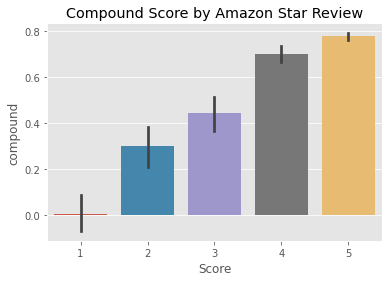

In [104]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

<AxesSubplot:xlabel='Score', ylabel='pos'>

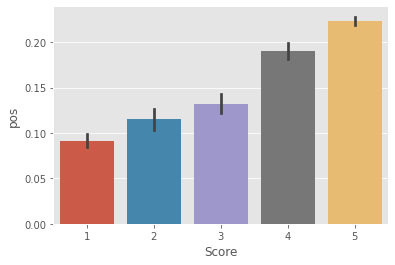

In [105]:
sns.barplot(data=vaders,x='Score',y='pos')

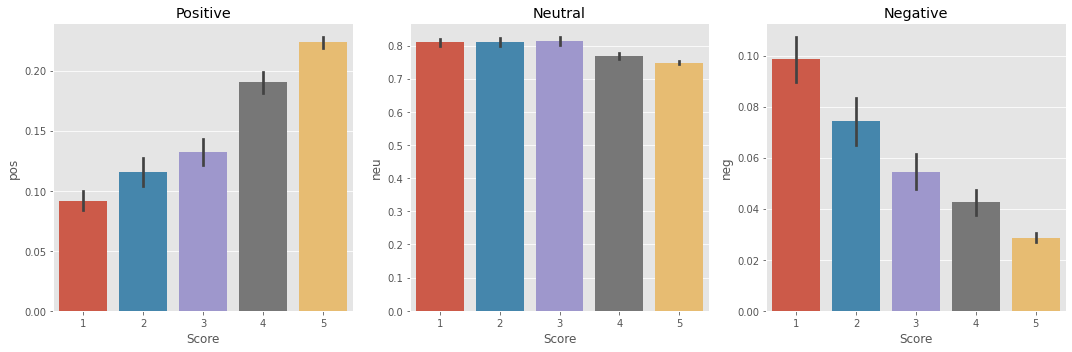

In [106]:
fig, axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

In [107]:
from transformers import AutoTokenizer

In [108]:
#!pip install transformers

In [109]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [110]:
# A pre-trained RoBERTa model fine-tuned for sentiment analysis on Twitter data.
MODEL='cardiffnlp/twitter-roberta-base-sentiment'

#AutoTokenizer.from_pretrained() method is used to load the pre-trained tokenizer associated with the specified model. 
#The tokenizer is responsible for converting text data into tokens that can be fed into the model.
tokenizer=AutoTokenizer.from_pretrained(MODEL) 

# Initiating the pre-trained RoBERTa model for sequence classification.
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [111]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [112]:
#Lets run it with ROBERT model
encoded_text=tokenizer(example,return_tensors='pt')  #return tensor is for pt(Pytorch)
output=model(**encoded_text)

In [113]:
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [114]:
encoded_text1 = tokenizer(example, return_tensors='pt')
input_ids = encoded_text1['input_ids']
attention_mask = encoded_text1['attention_mask']
output1 = model(input_ids=input_ids, attention_mask=attention_mask)

In [115]:
output1

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [116]:
# Accessing the logits
logits = output1.logits
print(logits)

tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>)


In [117]:
# Converting the  logits to a NumPy array
logits_numpy = logits.detach().numpy()

In [118]:
# Appllying the softmax to obtain probabilities
scores = softmax(logits_numpy, axis=1)
print(scores)

[[0.97635514 0.02068747 0.00295737]]


In [119]:
scores_dict={
    'robert_neg':scores[0][0],
    'robert_neu':scores[0][1],
    'robert_pos':scores[0][2]
            }

print(scores_dict)

{'robert_neg': 0.97635514, 'robert_neu': 0.02068747, 'robert_pos': 0.0029573706}


In [120]:
def polararity_scores_ROBERTA(example):
    encoded_text1 = tokenizer(example, return_tensors='pt')
    input_ids = encoded_text1['input_ids']
    attention_mask = encoded_text1['attention_mask']
    output1 = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = output1.logits
    logits_numpy = logits.detach().numpy()
    scores = softmax(logits_numpy, axis=1)
    scores_dict={
    'robert_neg':scores[0][0],
    'robert_neu':scores[0][1],
    'robert_pos':scores[0][2]
            }
    return scores_dict

# so bascially you could run the whole code but it wuld break for some instances because the text was not able to run through the Roberta model
# so lets skip for now those instances

In [121]:
%%time
res=dict()
for i,row in tqdm(df1.iterrows(),total=len(df1)):
    #print(i,row['Text'])
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key, value in vader_result.items():
        vader_result_rename[f'vader_{key}']=value
    roberta_result=polararity_scores_ROBERTA(text)
    both={**vader_result_rename,**roberta_result}
    #break

  0%|          | 0/3000 [00:00<?, ?it/s]

RuntimeError: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]

In [122]:
%%time
res2=dict()
for i,row in tqdm(df1.iterrows(),total=len(df1)):
    try:
        #print(i,row['Text'])
        text=row['Text']
        myid=row['Id']
        vader_result=sia.polarity_scores(text)
        vader_result_rename={}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}']=value    
        roberta_result=polararity_scores_ROBERTA(text)
        both={**vader_result_rename,**roberta_result}
        res2[myid]=both
        
    except RuntimeError:
        print(f'Broke for id{myid}')

  0%|          | 0/3000 [00:00<?, ?it/s]

Broke for id83
Broke for id187
Broke for id529
Broke for id540
Broke for id746
Broke for id863
Broke for id1053
Broke for id1070
Broke for id1156
Broke for id1321
Broke for id1375
Broke for id1498
Broke for id1575
Broke for id1796
Broke for id1826
Broke for id2169
Broke for id2248
Broke for id2476
Broke for id2492
Broke for id2584
Broke for id2610
Broke for id2897
Broke for id2898
Broke for id2902
Broke for id2928
Broke for id2942
Broke for id2944
Broke for id2947
Broke for id2948
CPU times: total: 7min 38s
Wall time: 10min 9s


In [123]:
vader_result

{'neg': 0.03, 'neu': 0.88, 'pos': 0.091, 'compound': 0.7724}

In [124]:
roberta_result

{'robert_neg': 0.2054085, 'robert_neu': 0.42340836, 'robert_pos': 0.3711832}

In [125]:
{**vader_result,**roberta_result}

{'neg': 0.03,
 'neu': 0.88,
 'pos': 0.091,
 'compound': 0.7724,
 'robert_neg': 0.2054085,
 'robert_neu': 0.42340836,
 'robert_pos': 0.3711832}

In [126]:
both

{'vader_neg': 0.03,
 'vader_neu': 0.88,
 'vader_pos': 0.091,
 'vader_compound': 0.7724,
 'robert_neg': 0.2054085,
 'robert_neu': 0.42340836,
 'robert_pos': 0.3711832}

In [127]:
results_df1=pd.DataFrame(res2).T 
results_df1=results_df1.reset_index().rename(columns={'index':'Id'})
results_df1=results_df1.merge(df1,how='left')

In [128]:
results_df1.head(3)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,robert_neg,robert_neu,robert_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


## #compare the scores between models

In [129]:
results_df1.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'robert_neg', 'robert_neu', 'robert_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

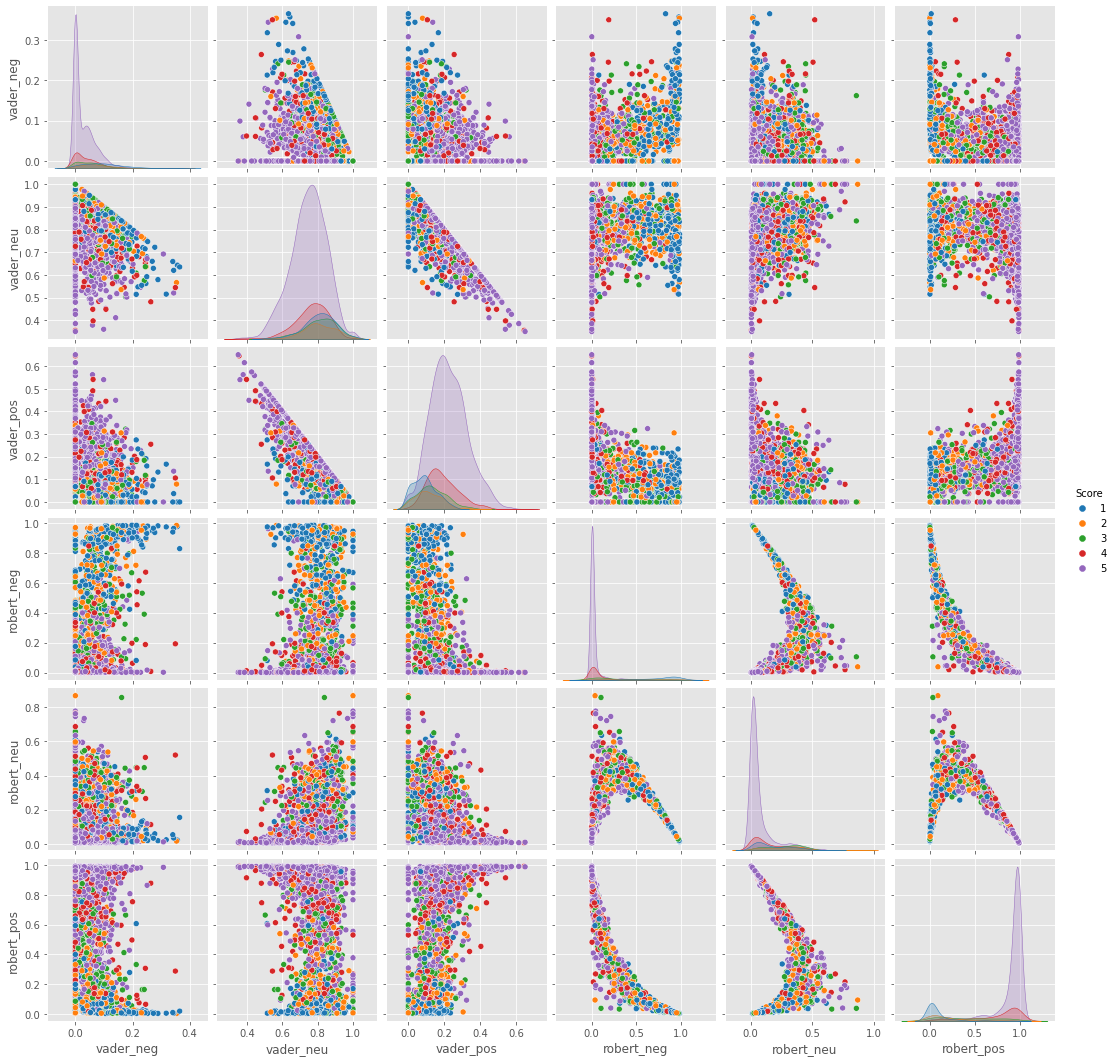

In [130]:
sns.pairplot(data=results_df1,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'robert_neg', 'robert_neu', 'robert_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [131]:
## Positive 1-Star and Negative 5-Star Reviews

In [132]:
results_df1.query('Score == 1') \
    .sort_values('robert_pos', ascending=False)['Text'].values[0]

'I got two Teas and one type of iced coffe and the rest were HOLIDAY COFFEES and APPLE CIDER!  Spicy Eggnog? Gingerbread? Bait and swtich.  The only redeeming factor - Amazon was great and issued me a refund.'

In [133]:
results_df1.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [134]:
# nevative sentiment 5-Star view

In [135]:
results_df1.query('Score == 5') \
    .sort_values('robert_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [136]:
results_df1.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'